In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading data
customer_df = pd.read_csv(r"/content/drive/MyDrive/united2/RAw/customers.csv")
call_df = pd.read_csv(r"/content/drive/MyDrive/united2/RAw/call.csv")
reason_df = pd.read_csv(r"/content/drive/MyDrive/united2/RAw/reason.csv")
sentiment_df = pd.read_csv(r"/content/drive/MyDrive/united2/RAw/sentiment.csv")
test_df = pd.read_csv(r"/content/drive/MyDrive/united2/RAw/test.csv")

In [ ]:
# merging data
merged_df = pd.merge(call_df, customer_df, on='customer_id', how='left')
merged_df = pd.merge(merged_df, reason_df, on='call_id', how='left')
merged_df = pd.merge(merged_df, sentiment_df, on='call_id', how='left')


In [ ]:
#merged_df


In [ ]:
# Convert columns to appropriate data type

# Assuming `call_id` and `customer_id` are identifiers and should be kept as strings (even if they appear numeric)
merged_df['call_id'] = merged_df['call_id'].astype(str)
merged_df['customer_id'] = merged_df['customer_id'].astype(str)

# `agent_id_x` and `agent_id_y` can be IDs for agents, so we will keep them as strings as well
merged_df['agent_id_x'] = merged_df['agent_id_x'].astype(str)
merged_df['agent_id_y'] = merged_df['agent_id_y'].astype(str)

# Datetime columns to be converted to datetime format
merged_df['call_start_datetime'] = pd.to_datetime(merged_df['call_start_datetime'])
merged_df['agent_assigned_datetime'] = pd.to_datetime(merged_df['agent_assigned_datetime'])
merged_df['call_end_datetime'] = pd.to_datetime(merged_df['call_end_datetime'])

# Call transcript and customer name should be string/text data
merged_df['call_transcript'] = merged_df['call_transcript'].astype(str)
merged_df['customer_name'] = merged_df['customer_name'].astype(str)

# `elite_level_code` can be categorical, so convert it to category type
merged_df['elite_level_code'] = merged_df['elite_level_code'].astype('category')

# `primary_call_reason` can also be a categorical column
merged_df['primary_call_reason'] = merged_df['primary_call_reason'].astype('category')

# `agent_tone` and `customer_tone` are likely categorical or string types representing the tone during the call
merged_df['agent_tone'] = merged_df['agent_tone'].astype('category')
merged_df['customer_tone'] = merged_df['customer_tone'].astype('category')

# `average_sentiment` and `silence_percent_average` seem to be numeric columns (float)
merged_df['average_sentiment'] = merged_df['average_sentiment'].astype(float)
merged_df['silence_percent_average'] = merged_df['silence_percent_average'].astype(float)

# Verify the data types after the conversion
#print(merged_df.dtypes)


In [ ]:
# Standardisation of text data
def text_cleaning(text_cleaning):
    if isinstance(text_cleaning, str):  # Check if the value is a string
        text_cleaning = text_cleaning.strip()  # Remove leading/trailing whitespaces
        text_cleaning = text_cleaning.lower()  # Convert to lowercase
        text_cleaning = re.sub(r'[-]', '', text_cleaning)  # Remove hyphens
        text_cleaning = re.sub(r'[^a-z0-9\s]', '', text_cleaning)  # Remove special characters
        text_cleaning = re.sub(r'\s+', ' ', text_cleaning)  # Replace multiple spaces with a single space
        return text_cleaning
    else:
        return np.nan  # Return NaN for non-string values

In [ ]:
# Apply the function to the primary_call_reason column
data['primary_call_reason'] = data['primary_call_reason'].apply(text_cleaning)

In [ ]:
# Remove duplicates, if any
merged_df = merged_df.drop_duplicates()
# Basic data overview
#print(merged_df.info())  # Check for missing values and data types


In [ ]:
# Calculate call duration
merged_df['call_duration'] = (merged_df['call_end_datetime'] - merged_df['call_start_datetime']).dt.total_seconds()

# Calculate agent response time
merged_df['response_time'] = (merged_df['agent_assigned_datetime'] - merged_df['call_start_datetime']).dt.total_seconds()

# Extract useful time-based features
merged_df['call_day'] = merged_df['call_start_datetime'].dt.day_name()  # Day of the week
merged_df['call_hour'] = merged_df['call_start_datetime'].dt.hour  # Hour of the day



In [ ]:
#merged_df.head()

In [ ]:
#merged_df.isnull().sum()

In [ ]:
# Drop rows with null values as they have less than 1% null values
merged_df = merged_df.dropna(subset=['agent_tone', 'average_sentiment'])
#merged_df.isnull().sum()

In [ ]:
#checking for correlation with other numerical variable
merged_df['elite_level_code'] = pd.to_numeric(merged_df['elite_level_code'], errors='coerce')

In [ ]:
numerical_cols = merged_df.select_dtypes(include=['number']).columns
#print(numerical_cols)


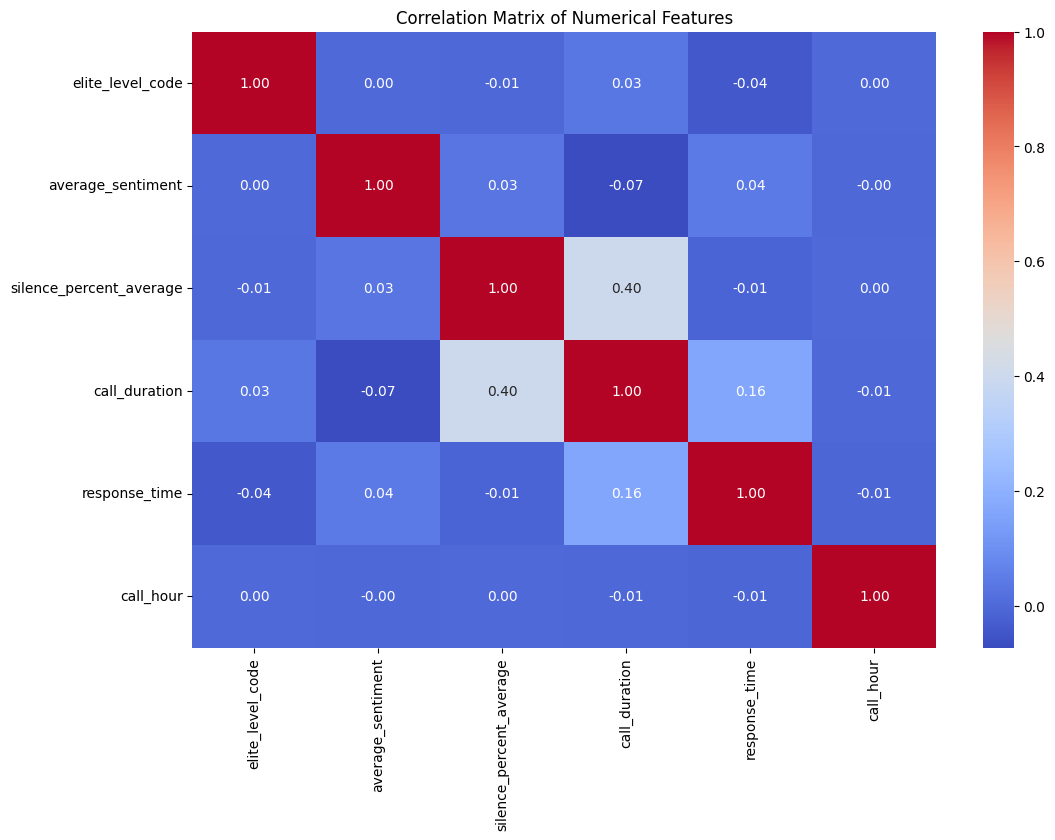

In [ ]:
# plot a heat map for numerical
numerical_df = merged_df[numerical_cols]
# Create a correlation matrix
correlation_matrix = numerical_df.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [ ]:
# Drop rows with null values in 'primary_call_reason' column
merged_df.dropna(subset=['primary_call_reason'], inplace=True)

In [ ]:
#merged_df.head(3)

In [ ]:
data = merged_df.copy()

In [ ]:
#data.dropna(inplace=True)
#data.isnull().sum()

In [ ]:
#Distribution of Data
#data.describe()

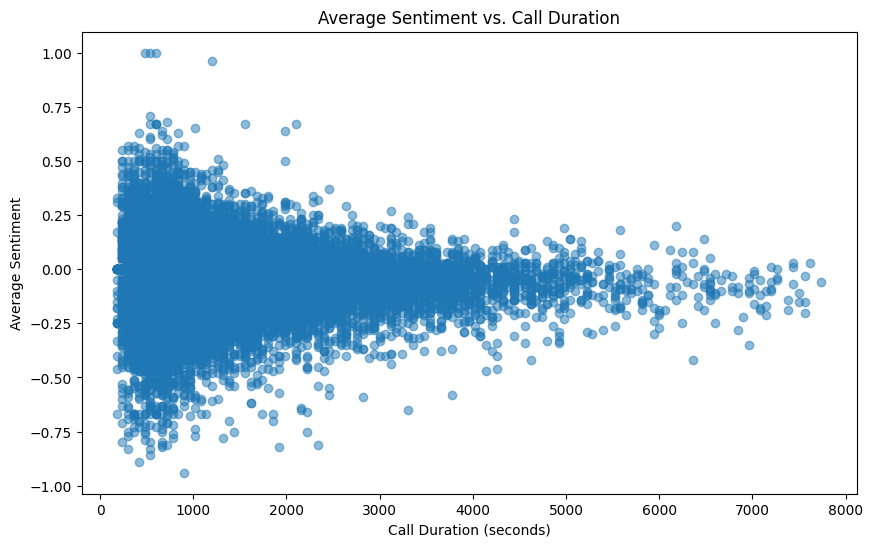

In [ ]:
# @title Average Sentiment vs. Call Duration
plt.figure(figsize=(10, 6))
plt.scatter(data['call_duration'], data['average_sentiment'], alpha=0.5)
plt.title('Average Sentiment vs. Call Duration')
plt.xlabel('Call Duration (seconds)')
_ = plt.ylabel('Average Sentiment')


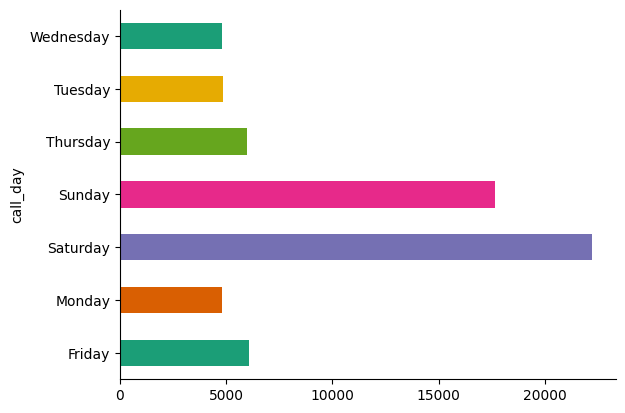

In [ ]:
# @title call_day

merged_df.groupby('call_day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

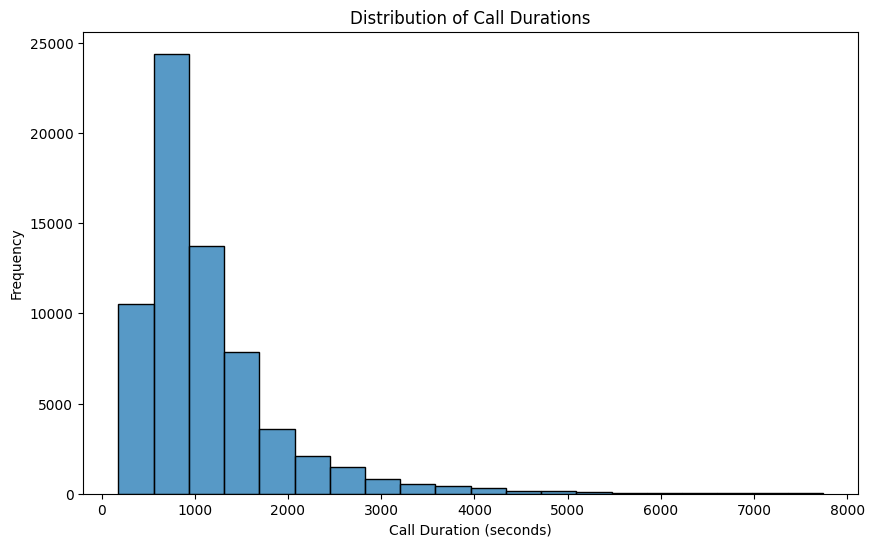

In [ ]:
# @title Distribution of Call Durations

plt.figure(figsize=(10, 6))
sns.histplot(data['call_duration'], bins=20)
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Call Durations')

<ipython-input-49-f465dc3dc04e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_df['hour_group'] = pd.cut(weekend_df['call_hour'], bins=range(0, 25, 3), right=False,
<ipython-input-49-f465dc3dc04e>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_calls_weekend = weekend_df.groupby('hour_group').size()
<ipython-input-49-f465dc3dc04e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour_grou

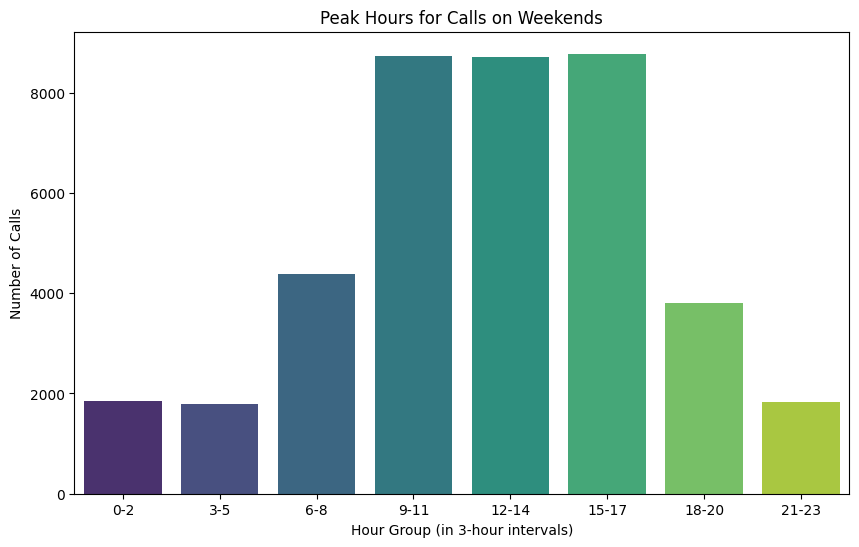

In [ ]:
# key driver of peak period i.e., on weekends
# Filter data for weekends only
weekend_df = data[data['call_day'].isin(['Saturday', 'Sunday'])]

# Create a new column that groups hours into packets of 3
weekend_df['hour_group'] = pd.cut(weekend_df['call_hour'], bins=range(0, 25, 3), right=False,
                                  labels=['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23'])

# Group by hour_group and count the number of calls
hourly_calls_weekend = weekend_df.groupby('hour_group').size()

# Reset index to convert the groupby result into a DataFrame for plotting
hourly_calls_weekend = hourly_calls_weekend.reset_index(name='call_count')

# Plot the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='hour_group', y='call_count', data=hourly_calls_weekend, palette='viridis')

# Add labels and title
plt.xlabel('Hour Group (in 3-hour intervals)')
plt.ylabel('Number of Calls')
plt.title('Peak Hours for Calls on Weekends')
plt.xticks(rotation=0)

# Show the plot
plt.show()


<ipython-input-102-956f8cffdc16>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_reasons_peak_hours = peak_hours_weekend_df.groupby('primary_call_reason').size()


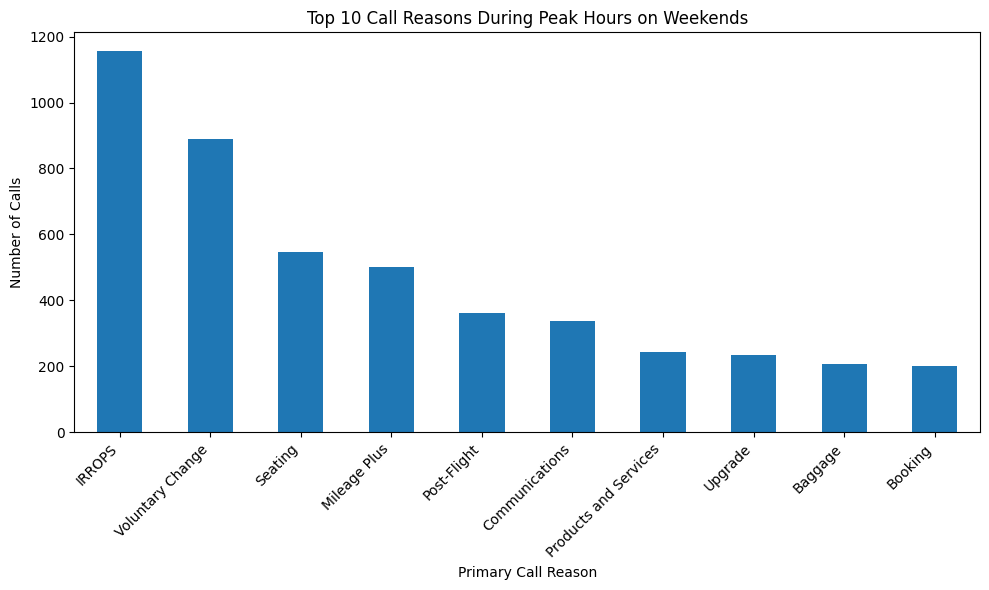

In [ ]:
# Filter data for weekends and peak hours
peak_hours_weekend_df = weekend_df[weekend_df['call_hour'].isin([hourly_calls_weekend.index[0], hourly_calls_weekend.index[1]])]

# Group by primary call reason and count the number of calls during peak hours
top_reasons_peak_hours = peak_hours_weekend_df.groupby('primary_call_reason').size()

# Sort the values in descending order and get the top 10
top_reasons_peak_hours = top_reasons_peak_hours.sort_values(ascending=False).head(10)

# Plot the bar chart for the top 10 reasons
plt.figure(figsize=(10, 6))
top_reasons_peak_hours.plot(kind='bar')
plt.xlabel('Primary Call Reason')
plt.ylabel('Number of Calls')
plt.title('Top 10 Call Reasons During Peak Hours on Weekends')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


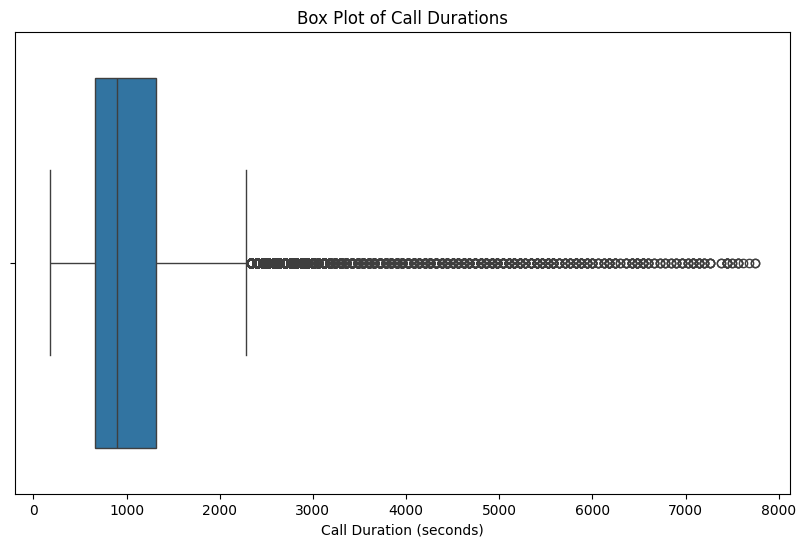

In [ ]:
#Factor contributing extended call duration
# box plot of call duration
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['call_duration'])
plt.xlabel('Call Duration (seconds)')
plt.title('Box Plot of Call Durations')
plt.show()


In [ ]:
# Calculate the median and IQR
call_duration_median = data['call_duration'].median()
call_duration_iqr = data['call_duration'].quantile(0.75) - data['call_duration'].quantile(0.25)
call_duration_upper_iqr = data['call_duration'].quantile(0.75) + 1.5 * call_duration_iqr
# Calculate the percentage of call duration in each category
below_median_percentage = (data['call_duration'] <= call_duration_median).mean() * 100
between_median_upper_iqr_percentage = ((data['call_duration'] > call_duration_median) & (data['call_duration'] <= call_duration_upper_iqr)).mean() * 100
above_upper_iqr_percentage = (data['call_duration'] > call_duration_upper_iqr).mean() * 100

# Print the results
print(f"Percentage of call duration below the median: {below_median_percentage:.2f}%")
print(f"Percentage of call duration between the median and upper IQR range: {between_median_upper_iqr_percentage:.2f}%")
print(f"Percentage of call duration above the upper IQR range: {above_upper_iqr_percentage:.2f}%")


Percentage of call duration below the median: 52.49%
Percentage of call duration between the median and upper IQR range: 40.25%
Percentage of call duration above the upper IQR range: 7.25%


<ipython-input-57-ff6c7290b1d4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_call_reasons.index, y=top_10_call_reasons.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: 

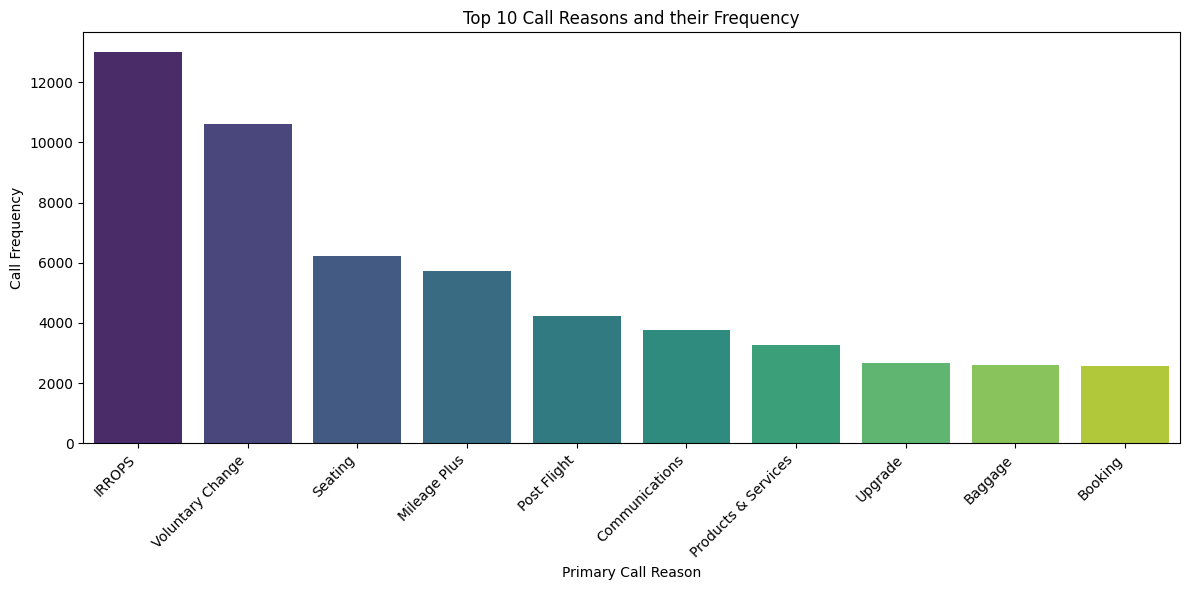

In [ ]:
# Top Primary Call reason
# Group by primary call reason and count the number of calls
call_reason_counts = data.groupby('primary_call_reason').size()

# Sort the values in descending order and get the top 10
top_10_call_reasons = call_reason_counts.sort_values(ascending=False).head(10)

# Plot the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_call_reasons.index, y=top_10_call_reasons.values, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Primary Call Reason')
plt.ylabel('Call Frequency')
plt.title('Top 10 Call Reasons and their Frequency')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#data.head()

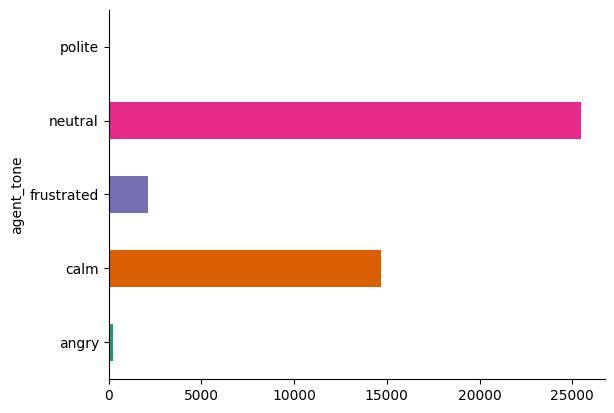

In [ ]:
# agent_tone

# Group by agent tone and count the number of calls
data.groupby('agent_tone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


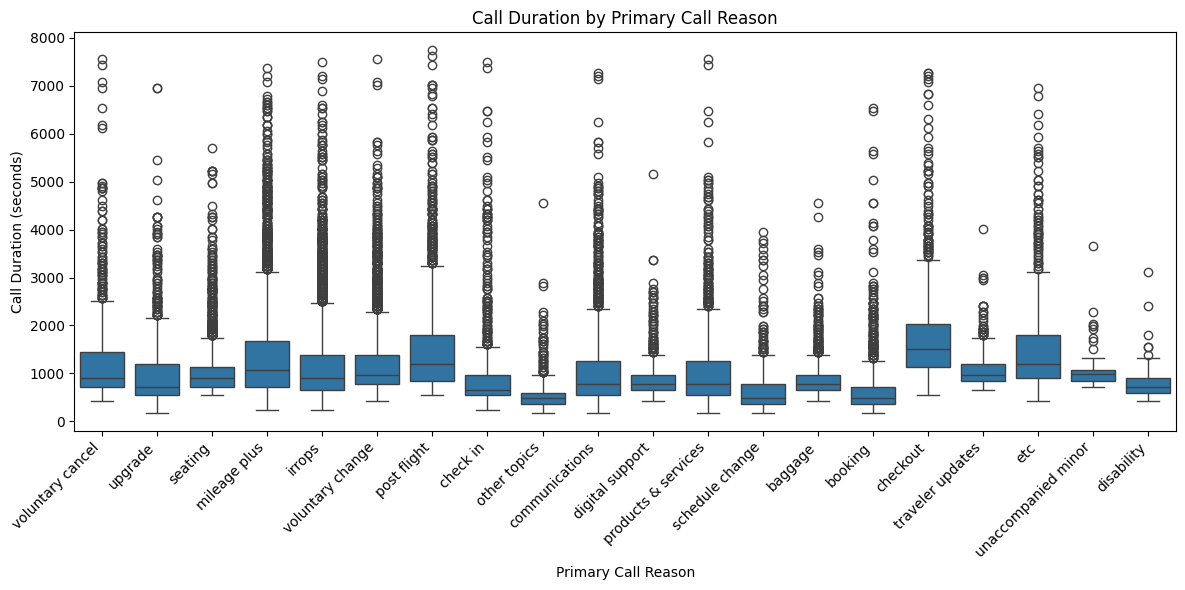

In [ ]:
# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='primary_call_reason', y='call_duration', data=data)
plt.xlabel('Primary Call Reason')
plt.ylabel('Call Duration (seconds)')
plt.title('Call Duration by Primary Call Reason')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


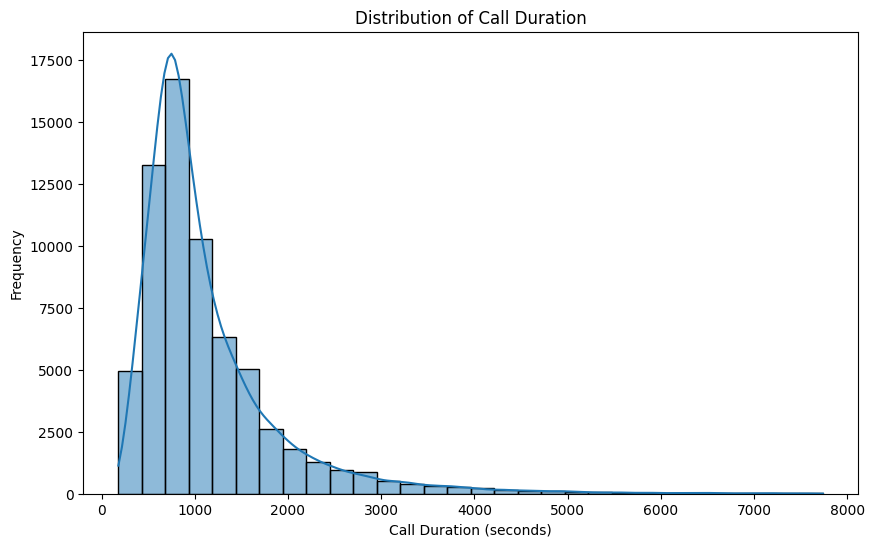

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


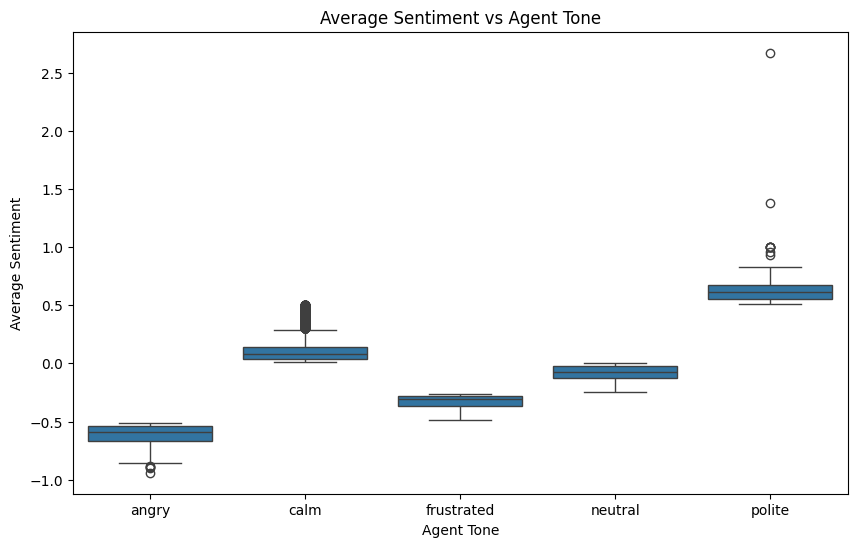

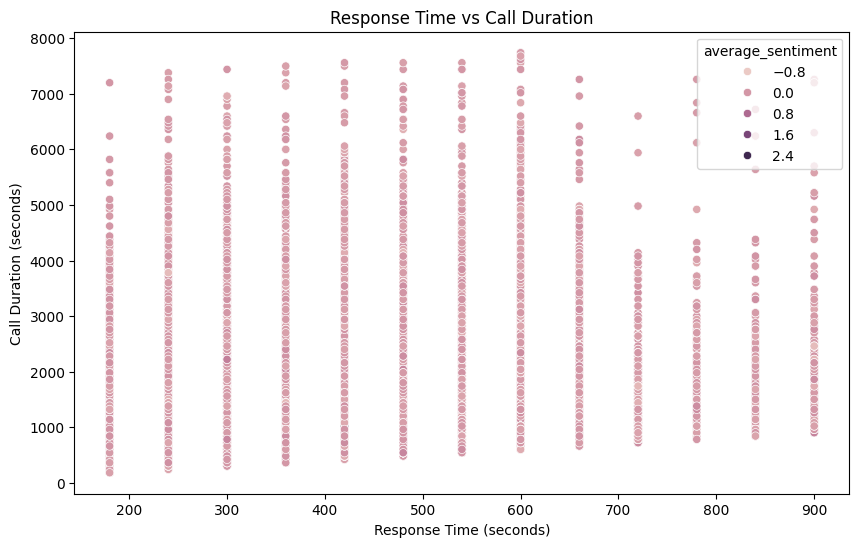

In [ ]:
# Distribution of call durations
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['call_duration'], bins=30, kde=True)
plt.title('Distribution of Call Duration')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Frequency')
plt.show()
# Average sentiment analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='agent_tone', y='average_sentiment', data=merged_df)
plt.title('Average Sentiment vs Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Average Sentiment')
plt.show()

# response time vs call duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='response_time', y='call_duration', hue='average_sentiment', data=merged_df)
plt.title('Response Time vs Call Duration')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Call Duration (seconds)')
plt.show()


Average Handling Time & Average Service Time

In [ ]:
# Calculate AHT (time spent by agent on each call in seconds)
data['AHT'] = (data['call_end_datetime'] - data['agent_assigned_datetime']).dt.total_seconds()

In [ ]:
# Calculate AST (time spent by the customer waiting for an agent to answer in seconds)
data['AST'] = (data['agent_assigned_datetime'] - data['call_start_datetime']).dt.total_seconds()


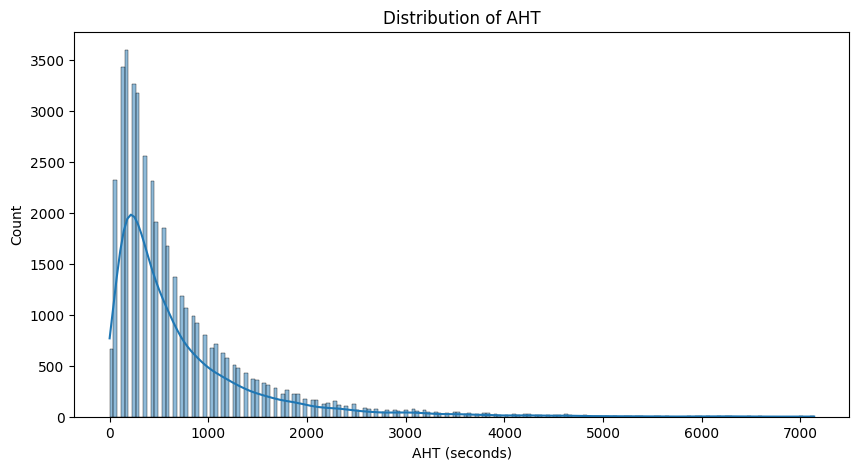

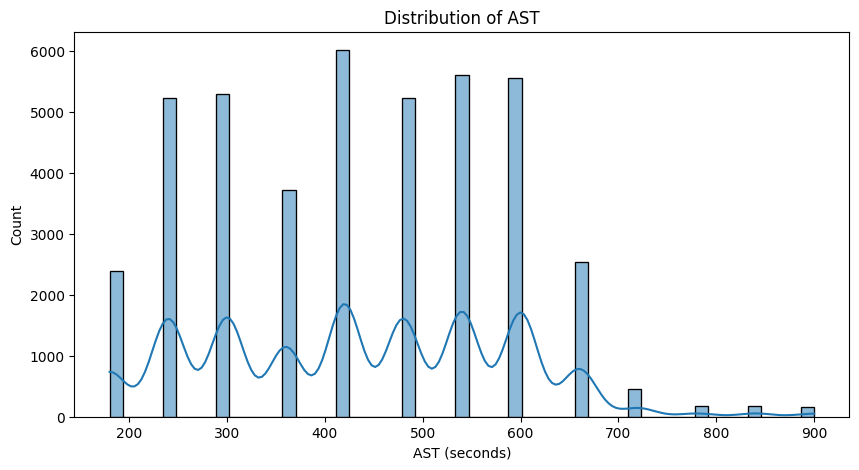

In [ ]:
# Distribution of AHT
plt.figure(figsize=(10, 5))
sns.histplot(data['AHT'], kde=True)
plt.title('Distribution of AHT')
plt.xlabel('AHT (seconds)')
plt.show()

# Distribution of AST
plt.figure(figsize=(10, 5))
sns.histplot(data['AST'], kde=True)
plt.title('Distribution of AST')
plt.xlabel('AST (seconds)')
plt.show()


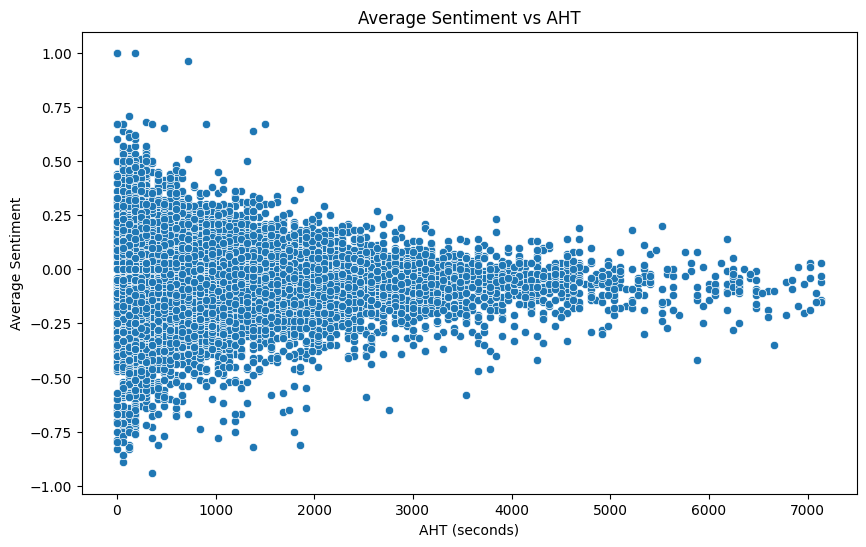

In [ ]:
# Average Sentiment vs AHT
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AHT', y='average_sentiment', data=data)
plt.title('Average Sentiment vs AHT')
plt.xlabel('AHT (seconds)')
plt.ylabel('Average Sentiment')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


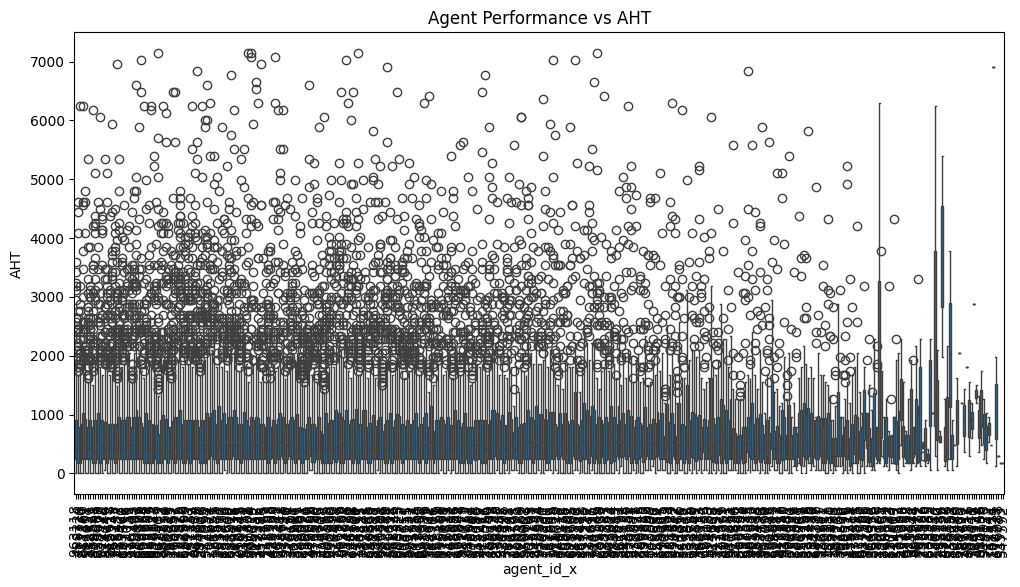

In [ ]:
# agent performance against AHT
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='agent_id_x', y='AHT')
plt.xticks(rotation=90)
plt.title('Agent Performance vs AHT')
plt.show()


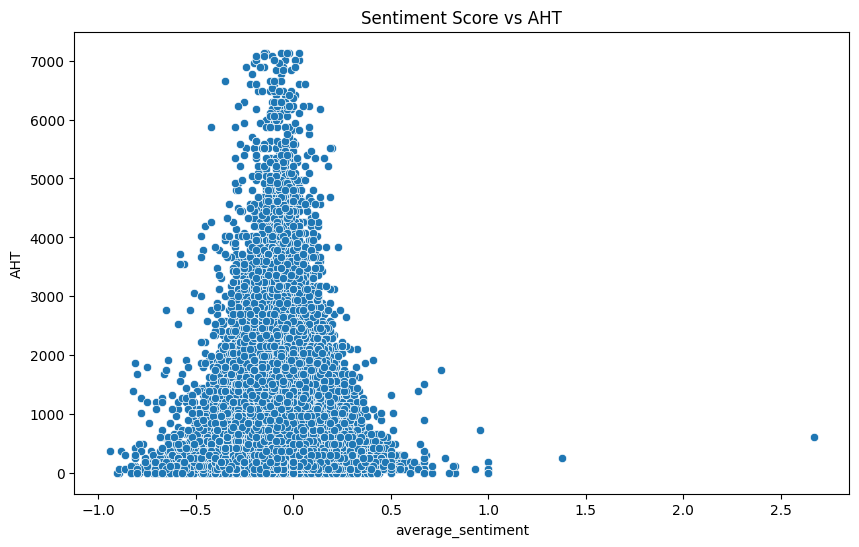

In [ ]:
# sentiment vs AHT
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='average_sentiment', y='AHT')
plt.title('Sentiment Score vs AHT')
plt.show()


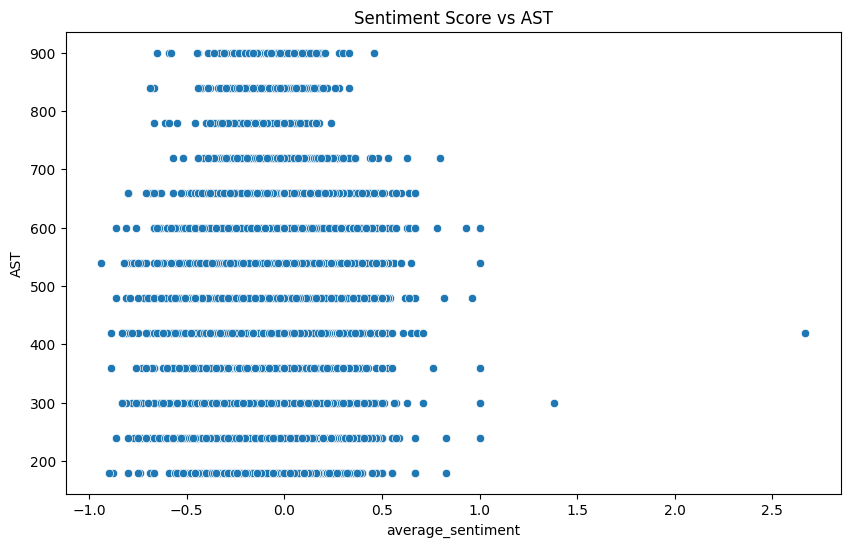

In [ ]:
# Sentiment vs AST
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='average_sentiment', y='AST')
plt.title('Sentiment Score vs AST')
plt.show()


<ipython-input-44-96c435908596>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_aht_reasons.index, y=top_10_aht_reasons.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: Wh

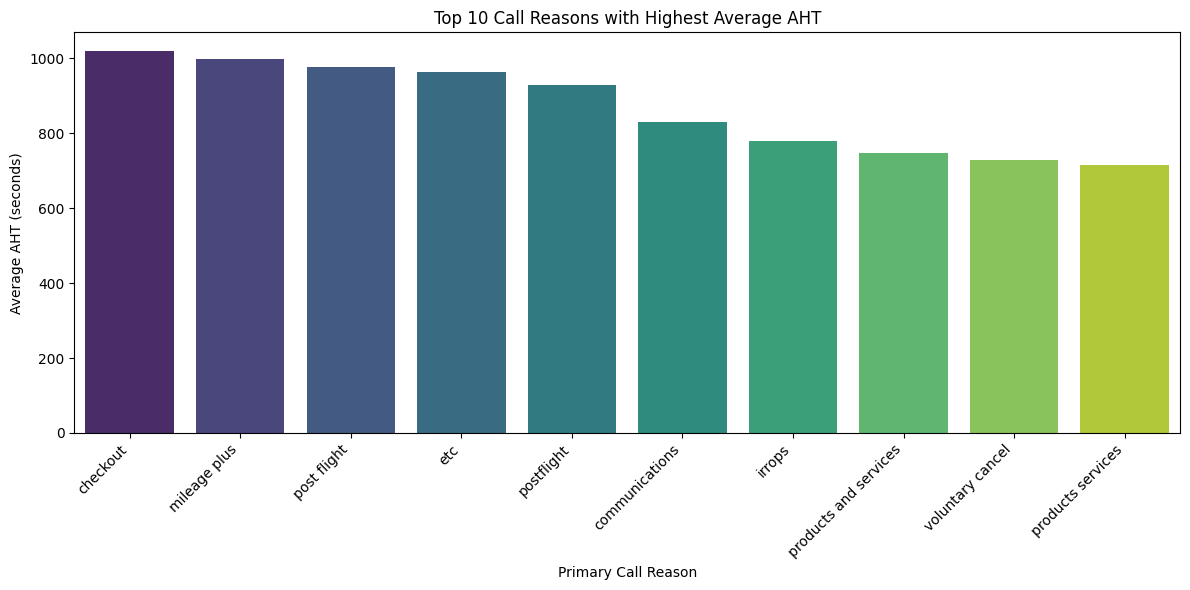

In [ ]:
# Key driver reason durong peak hours

# Group by primary call reason and calculate the average AHT for each reason
aht_by_reason = data.groupby('primary_call_reason')['AHT'].mean()

# Sort the AHT values in descending order and get the top 10
top_10_aht_reasons = aht_by_reason.sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_aht_reasons.index, y=top_10_aht_reasons.values, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Primary Call Reason')
plt.ylabel('Average AHT (seconds)')
plt.title('Top 10 Call Reasons with Highest Average AHT')

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-48-d3908482fca7>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_call_reason_counts.index, y=sorted_call_reason_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: Fut

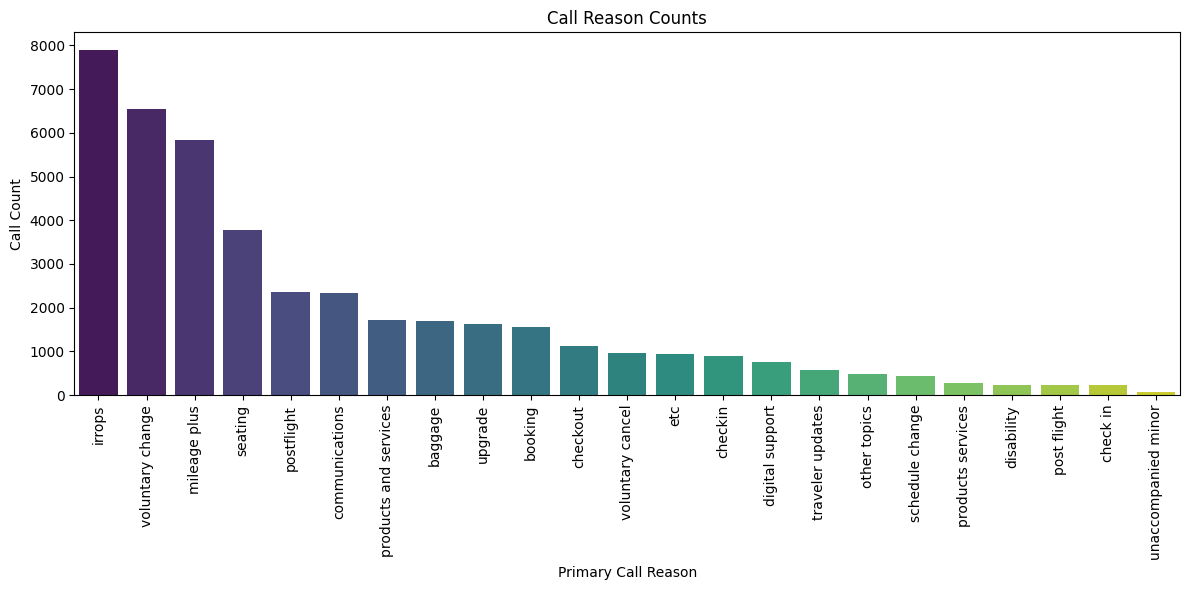

Most Frequent Call Reason: irrops (7903 calls)
Least Frequent Call Reason: unaccompanied minor (60 calls)
Percentage Difference: 99.24%


In [ ]:
# Most frequent and least Frequent call reason

# Group by primary call reason and count the number of calls
call_reason_counts = data.groupby('primary_call_reason').size()

# Sort the values in descending order
sorted_call_reason_counts = call_reason_counts.sort_values(ascending=False)

# Get the most and least frequent call reasons
most_frequent_reason = sorted_call_reason_counts.index[0]
least_frequent_reason = sorted_call_reason_counts.index[-1]

# Calculate the percentage difference
most_frequent_count = sorted_call_reason_counts[most_frequent_reason]
least_frequent_count = sorted_call_reason_counts[least_frequent_reason]
percentage_difference = ((most_frequent_count - least_frequent_count) / most_frequent_count) * 100

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_call_reason_counts.index, y=sorted_call_reason_counts.values, palette='viridis')
plt.xlabel('Primary Call Reason')
plt.ylabel('Call Count')
plt.title('Call Reason Counts')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

# Print the most and least frequent reasons along with the percentage difference
print(f"Most Frequent Call Reason: {most_frequent_reason} ({most_frequent_count} calls)")
print(f"Least Frequent Call Reason: {least_frequent_reason} ({least_frequent_count} calls)")
print(f"Percentage Difference: {percentage_difference:.2f}%")


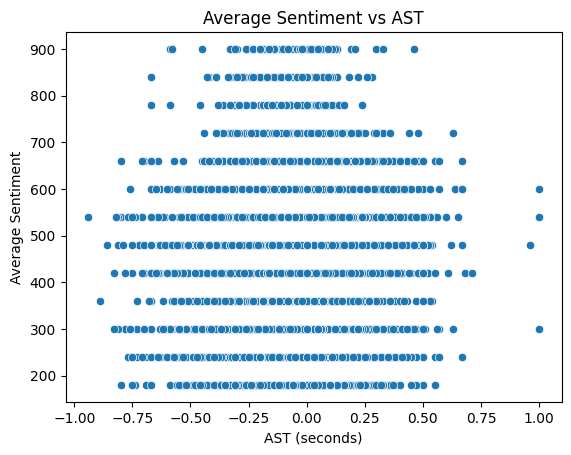

In [ ]:
# Average Sentiment vs AST
sns.scatterplot(y=data['AST'], x=data['average_sentiment'], data=data)
plt.title('Average Sentiment vs AST')
plt.xlabel('AST (seconds)')
plt.ylabel('Average Sentiment')
plt.show()


In [ ]:
data['AST'].mean()

433.6320721482421

In [ ]:
#merged_df.head()

In [ ]:
# saving the data locally
data.to_csv('/content/drive/MyDrive/united2/RAw/data.csv', index=True)


In [ ]:
#kindly move to second code --- Call_Transcript_Analysis